<a href="https://colab.research.google.com/github/Pranjita1/data-analysis-with-python/blob/master/MLDM_ClusteringElbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
''' MLDM Assignment - 1 
Pranjita Chakraborty - MSc. Data Science 2019-21 batch
Topic - Clustering and elbow method for K-means
'''

' MLDM Assignment - 1 \nPranjita Chakraborty - MSc. Data Science 2019-21 batch\nTopic - Clustering and elbow method for K-means\n'

In [0]:
#Task - 1 - Image pixel Clustering

#Step1 - importing necessary libraris and package for this task
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [0]:
im = Image.open('krishna.jpg', 'r') #these steps will get the pixels from the data, so that one can apply elbow method for finding Centroids

In [0]:
pixels = list(im.getdata())
pixels_flat = [x for sets in pixels for x in sets] 
'''
pixels is the list that contains all the pixel values which can be printed to see those values.
But the list got is a list of sets and some times its needed to flatten the list 
for example if the list is like: [(123,124,145,120), (345,453,234,124),……] 
and the list that is needed is [123, 124, 145, 120, 345, 453, 234, 124….]'''

'\npixels is the list that contains all the pixel values which can be printed to see those values.\nBut the list got is a list of sets and some times its needed to flatten the list \nfor example if the list is like: [(123,124,145,120), (345,453,234,124),……] \nand the list that is needed is [123, 124, 145, 120, 345, 453, 234, 124….]'

In [0]:
X = np.array(pixels_flat)
X.shape

(405600,)

In [0]:
#Since X shape shows it's a 1-D array, but we need a 2-D array, so we reshape it, adding a column against rows
#also note that pixels_flat was a list in python
#for implementing further steps it has been converted to numpy array.
X = X.reshape(-1,1)

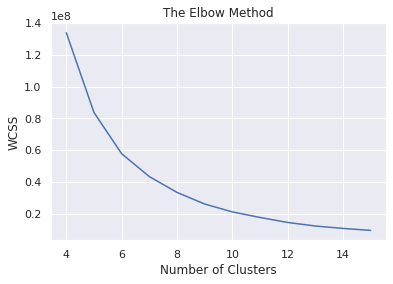

In [0]:
#Applying Elbow method - detailed description given in Task two
#As per Question, the range to test for K is taken as 4 to 16.

from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
#importing libraries

wcss=[]
for i in range(4,16):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(4,16),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.figure(1, figsize=(20,15))
plt.show()

In [0]:
#Next, I decided to use K-Means clustering in OPEN CV 
image = cv2.imread("krishna.jpg")
#Converting image to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(135200, 3)


In [0]:
# define stopping criteria 
#we are going to stop either when some number of iterations exceeded (say 1000) 
#or if the clusters move less than some epsilon value (let's pick 0.2 here)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 0.2)

# number of clusters (K) obtained from the elbow plot
k = 8
compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [0]:
#in the above algo, labels array is the cluster label for each pixel
#centers refers to the center points (each centroid's value).
#cv2.KMEANS_RANDOM_CENTERS just indicates OpenCV to randomly assign the values of the clusters initially.

# since the pixels were converted to float to pass the parameters, now convert back to 8 bit values
centers = np.uint8(centers)
# flatten the labels array
labels = labels.flatten()
# constructing segmented image - The compressed image where pixel colors are replaced with corresponding cluster centroid’s color
segmented_image = centers[labels]
# finally pulling all together
krishna_image = segmented_image.reshape(image.shape)

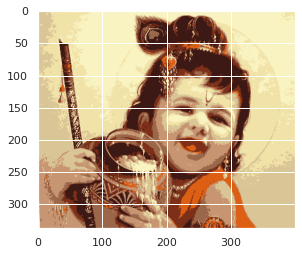

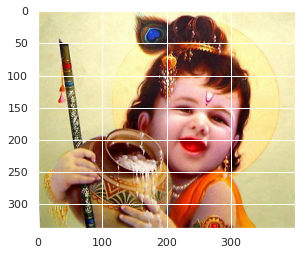

In [0]:
# show the image
plt.imshow(krishna_image) #new
plt.show()
plt.imshow(image) #original
plt.show()

In [0]:
#saving the image in google colab directory
plt.savefig('krishna_image.png')

<Figure size 432x288 with 0 Axes>

In [0]:
import os
print( os.getcwd() )
print( os.listdir() ) #checking what files in Google lab environment

/content
['.config', 'krishna.jpg', 'krishna_image.png', '.ipynb_checkpoints', 'sample_data']


In [0]:
from google.colab import files
files.download( "krishna_image.png" )  #downloaded to my pc  


In [0]:
from google.colab import files
files.download('krishna.jpg')

In [0]:
krishna_image.shape

(338, 400, 3)

In [0]:
#finally memory comparison
#for the original
import sys

sys.getsizeof(image)

405728

In [0]:
#for new image
sys.getsizeof(krishna_image)

128

In [0]:
#We see that new image occupies much less space than the original.

In [0]:
#Task 2 - using elbow method for plotting K-Means

url = 'https://www.dropbox.com/s/wi1som52h8vo6ez/elbow.txt?dl=0' #getting data

In [0]:
dataset=pd.read_fwf(url) #initially I felt that I got to read text file and proceed so tried this method

In [0]:
dataset.head()  #but here, I got confused with the results

,"<!DOCTYPE html><html xml:lang=""en"" class=""maestro"" xmlns=""http://www.w3.org/1999/xhtml""><head><script nonce=""AGsvX03WQU51pN5ulm2h"">",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 504,Unnamed: 505,Unnamed: 506,Unnamed: 507,Unnamed: 508,Unnamed: 509,Unnamed: 510,Unnamed: 511,Unnamed: 512,Unnamed: 513,Unnamed: 514,Unnamed: 515,Unnamed: 516,Unnamed: 517,Unnamed: 518,Unnamed: 519,Unnamed: 520,Unnamed: 521,Unnamed: 522,Unnamed: 523,Unnamed: 524,Unnamed: 525,Unnamed: 526,Unnamed: 527,Unnamed: 528,Unnamed: 529,Unnamed: 530,Unnamed: 531,Unnamed: 532,Unnamed: 533,Unnamed: 534,Unnamed: 535,Unnamed: 536,Unnamed: 537,Unnamed: 538,Unnamed: 539,Unnamed: 540,Unnamed: 541,Unnamed: 542,Unnamed: 543
0,window._goch_ = {};,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"window.addEventListener('click', function(even...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'use strict';,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,for (var elm = event.target; elm; elm = elm.pa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,if (elm.id &&,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#I manually converted the data points to csv
#I assumed that all the values in the txt file are to be treated as individual datapoints
#Based on the data points, and using the algorithm from sklearn the idea is: find the best K-means for clustering the datapoints

df=pd.read_csv('elbow data - Sheet.csv', header=None) 

In [0]:
df.head()

,0
0,-274771081120538
1,-193947260410004
2,-226492186954241
3,-196353080858923
4,-137966088492499


In [0]:
#selected only 2nd column of dataframe, as only it contains necessary data for trainng.
#Also, reshaping it so that it becomes 2-D
X=df.iloc[:,-1].values
X = X.reshape(-1,1)

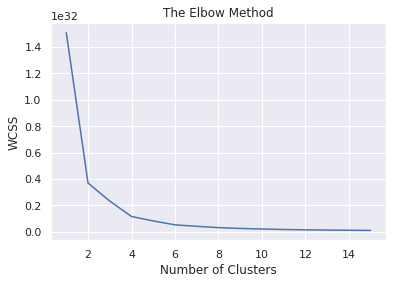

In [0]:
#Intuition behind this K-means and elbow method - 
''' 
K-means is unsupervised learning method of clustering
It finds similarity between datapoints and groups then into clusters. 
The attempt made is to minimise the intra-cluster distance while at the same time maximising inter-cluster distance for better accuracy of segments
Two metrics is followed for this distance - Euclidean or Manhattan
As first step to implementing this algorithm, we have to select our K-vlaues, which is also referred as centroids or cluster number or group number. 
Say, I have 3 centroids, I will have 3 clusters.
After initializing a K-point randomly, we calculate distance (euclidean) between data points and centroid. Euclidean dist = sqrt(x2-x1)^2 
This leaves us with groups or clusters based upon nearest distances. 
Next, for each group, we find mean or avg of all data elements inside the group.
Then, we update our centroid and repeat the process until a clear distinction of elements happen such that as best as no element of a cluster type is found in any other cluster.

Now, the major question is - how to select the optimal K-value.
For this, we use Elbow method. 
Taking range from question 1, let's have K = 1,16
For K = 1, we have a centroid.
Next, we calculate WCSS = Within cluster sum of squares, or also called as distortion which is summation of squares of the sum of centroid and each datapoint 
                        = Σ(Ci + xi)^2, where i ranges from start to end of range mentioned, here it will be from 1 to 16.
Upon plotting WCSS wrt K, for K=1, usually the corresponding WCSS value is very high and curve keeps reducing till a point after which it becomes normalized. 
We select the K-value which corresponds to an abrupt decrease towards normalizing in the curve.
'''

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,16):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,16),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
#when we run the above algorithm, if one gets a warning / message to reshape X, in case one doesn't do it beforehand,
#apply this method to check the dimension of X.
#Since I have done it, it will print 2, else, the dimension
X.ndim 

2

In [0]:
X.shape

(1000, 1)

In [0]:
#Here we see that X has 100 rows and 1 column

In [0]:
#From all above, we conclude that the best K-Means is 4.